# 파이썬 기반의 AI를 위한 기초수학, 확률및통계

# 연속확률분포
- 정규분포
- 카이제곱분포 : 표준정규를 하나 제곱하면 자유도 1인 카이제곱 분포
  + 정규분포 값을 제곱해서 모아서 만든 것이 카이제곱 분포
- F분포 : 카이제곱 분포 2개를 각각 자유도로 나누고, 그 비율을 계산한 분포

## 카이제곱 분포
- 주로 분산 추정, 독립성, 적합도 검정 등에 사용되는 확률 분포
  + 독립성, 적합성 검정 ==> 범주 데이터를 활용해서 검정
- 자유도에 따라 분포 모양이 달라짐
  + 자유도가 크다 ==> 샘플이 크다 ==> 정규분포로 근사사

In [7]:
## 강봉주 
## bonjour.kang@gmail.com
##
## 표본 분포
##

In [8]:
# Mac Only
import ssl
ssl._create_default_https_context = ssl._create_unverified_context

In [2]:
# 필요한 패키지
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

import scipy
from scipy import linalg as la
import scipy.stats as ss
import scipy.special

# 한글출력
plt.rcParams['font.family'] = 'Malgun Gothic' #  Windows 'Malgun Gothic' 
plt.rcParams['axes.unicode_minus'] = False

# 필요한 패키지 2
from pgmpy.factors.discrete import JointProbabilityDistribution as JPD
import sympy

scipy.__version__

'1.15.3'

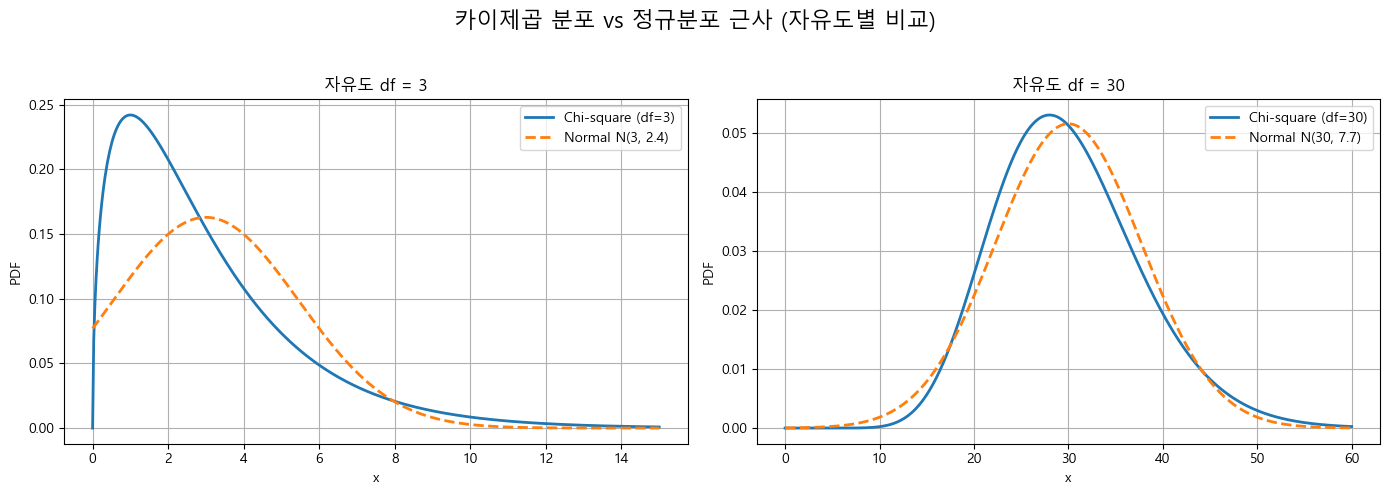

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import chi2, norm

# 설정
fig, axes = plt.subplots(1, 2, figsize=(14, 5)) 
dfs = [3, 30]  # 자유도 3과 30
x_ranges = [np.linspace(0, 15, 500), np.linspace(0, 60, 500)]

for ax, df, x in zip(axes, dfs, x_ranges):
    # 카이제곱 PDF
    chi_pdf = chi2.pdf(x, df) # 이산확률분포는 확률질량함수(mass function)를 사용, 연속확률분포는 density function
    # 정규 근사 PDF
    norm_pdf = norm.pdf(x, loc=df, scale=np.sqrt(2 * df))

    ax.plot(x, chi_pdf, label=f'Chi-square (df={df})', linewidth=2)
    ax.plot(x, norm_pdf, '--', label=f'Normal N({df}, {np.sqrt(2*df):.1f})', linewidth=2)

    ax.set_title(f'자유도 df = {df}')
    ax.set_xlabel('x')
    ax.set_ylabel('PDF')
    ax.legend()
    ax.grid(True)

fig.suptitle('카이제곱 분포 vs 정규분포 근사 (자유도별 비교)', fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

## F분포
- 두 개의 독립적인 카이제곱 분포를 사용한다.
- 값의 범위 : 항상 0 이상
  + 정규분포 음수 존재 ==> 정규분포 제곱하는 순간 양수
- 활용 용도 : 분산 비교, 회귀의 유의성 검정, anova (그룹 비교 검정)
- F값 : 표본 1의 분산 / 표본 2의 분산

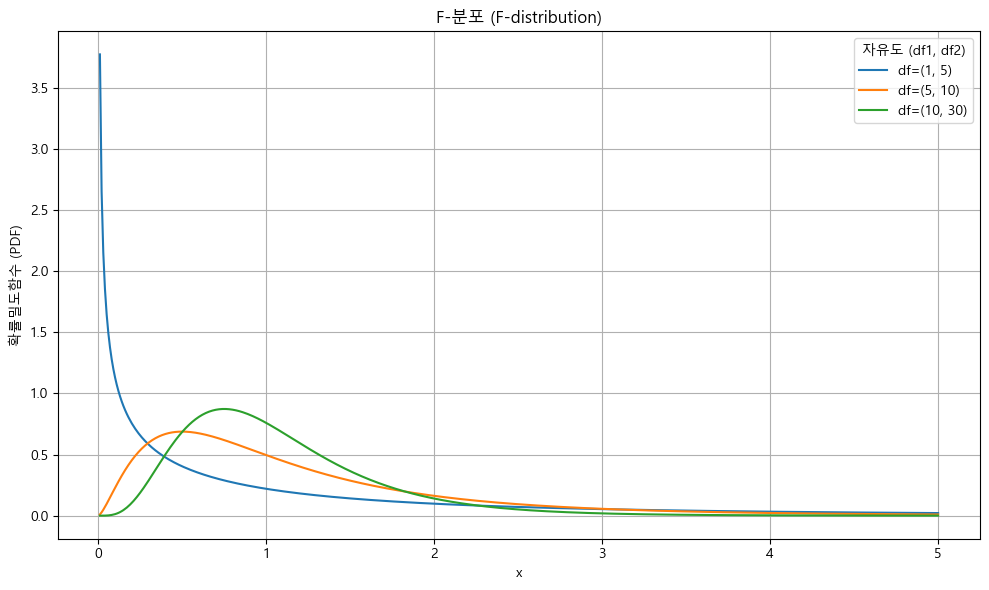

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import f

x = np.linspace(0.01, 5, 500)
fig, ax = plt.subplots(figsize=(10, 6))

# 자유도 조합
df_pairs = [(1, 5), (5, 10), (10, 30)]

for dfn, dfd in df_pairs:
    ax.plot(x, f.pdf(x, dfn, dfd), label=f'df=({dfn}, {dfd})')

ax.set_title('F-분포 (F-distribution)')
ax.set_xlabel('x')
ax.set_ylabel('확률밀도함수 (PDF)')
ax.legend(title='자유도 (df1, df2)')
ax.grid(True)
plt.tight_layout()
plt.show()

## 자유도 공부
- 모집단과 표본(샘플)의 관계를 통해 설명해야 의미 있음.
    + 통계 검정을 하는 근본 이유 : 모수 추정
    + 평균 x 구할 때, 이미 자유도 1을 사용했음
- 앞의 값을 마음대로 정하면 세번째 값은 자동으로 결정됨.
    + 3번째 값은 선택할 자유가 없음.
    + 표본을 통해서 진행할 때 표본의 개수 -1을 함.

- (정리)
  + 모집단을 가지고 계산 -> N으로 평균 내기
  + 표본을 가지고 계산 -> N-1로 평균 내기

In [10]:
#
# 데이터 구성
#

# [HFWS] 데이터: “가계금융복지조사( 2017년 이후) > 가구마스터(제공)[2018가구금융복지조사]”
df = pd.read_csv('https://raw.githubusercontent.com/bong-ju-kang/kmu-mba-statistics/master/Data/MDIS_2018_HFWS.txt', 
                 header=None)
df.head(2)

,0,1,2,3,4,5,6,7,8,9,...,151,152,153,154,155,156,157,158,159,160
0,2018,10200261,P,1127.905175,NaN,2255.0,G2,1,2,G1,...,NaN,NaN,1.0,80.0,60,150,4.0,NaN,NaN,NaN
1,2018,10200371,P,2223.797699,NaN,4515.0,G1,1,4,G2,...,NaN,NaN,1.0,70.0,150,200,4.0,NaN,NaN,NaN


In [11]:
# 가구당 연간 소득액: 110번째
income = df[109]
np.round(np.mean(income), 1)

np.float64(5364.0)

In [12]:
# 모집단으로 가정
# 모 평균, 모 표준편차
np.round([np.mean(income),np.std(income, ddof=0)], 1 )

array([5364. , 5818.4])

In [13]:
# 크기가 100인 임의 표본 1개의 표본 평균
size = 100
np.random.seed(1)

# 비복원 추출
index = np.random.choice(len(income), size, replace=False)

sample_mean = np.mean(income[index])
np.round(sample_mean, 1)

np.float64(5323.1)

In [14]:
# 표본 비율
np.round(size / len(income), 4)

np.float64(0.0054)

In [15]:
# 표본평균의 평균
num_samples = 1000
size = 100
result = []

np.random.seed(123)
for i in np.arange(num_samples):
    index = np.random.choice(len(income), size, replace=False)
    result.append(np.mean(income[index]))
np.round(np.mean(result), 2)

np.float64(5343.76)

In [16]:
#
# 이항분포의 평균의 분포
#

# 이항 분포 모수 정의
num_samples = 100
trials = 1000
event_prob = 1/6
size = 5

# 기대값
expected_count = trials * event_prob
np.round(expected_count, 2)

np.float64(166.67)

In [17]:
# 표본 성공건수의 평균
result = []

np.random.seed(1234)
for i in np.arange(num_samples):
    value = np.random.binomial(n=trials, p=event_prob, size=size)
    result.append(np.mean(value))

np.round(np.mean(result), 2)

np.float64(166.23)

In [18]:
# CLT를 이용한 확률 계산
z = (30-100*1/5)/np.sqrt(100*1/5*4/5)
prob = 1 - ss.norm.cdf(z)
prob.round(4)

np.float64(0.0062)

## 카이제곱 분포

In [19]:
# 적률생성 함수를 이용한 평균과 분산 계산
k, t = sympy.symbols('k, t')
expr = (1-2*t)**(-k/2)

# 1차 적률(기대값)
M1 = sympy.Lambda(t, expr.diff(t).simplify())
EX = M1(0)
EX

k

In [20]:
# 2차 적률
M2 = sympy.Lambda(t, expr.diff(t, t).simplify())
EXX = M2(0)
EXX

k*(k + 2)

In [21]:
# 분산
(EXX- EX**2).simplify()

2*k

## t 분포

In [22]:
# 확률 계산
dof = 10
prob = 1 - ss.t.cdf(2, df=dof)
prob.round(3)

np.float64(0.037)

## F 분포

In [23]:
# 확률 계산
dof = [90, 100]
prob = 1 - ss.f.cdf(1.5, dfn=dof[0], dfd=dof[1])
prob.round(3)

np.float64(0.024)

In [24]:
# 상위 % 지정 후 분위수 계산: ppf(percent point function) 함수
alpha = 0.05
dof = [90, 100]
qpoint = ss.f.ppf(1-alpha, dfn=dof[0], dfd=dof[1])
qpoint.round(3)

np.float64(1.402)